___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
seed = random_state = 42

In [4]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

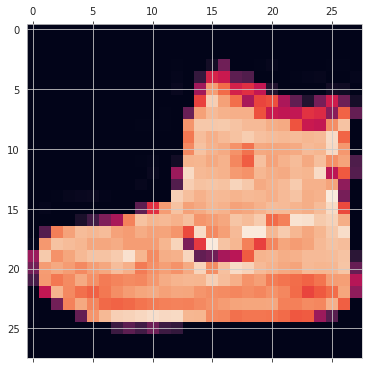

In [9]:
# plt.imshow(X_train[0])
plt.matshow(X_train[0])

In [10]:
y_train[0]

9

In [11]:
y_train.shape

(60000,)

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [14]:
pd.Series(y_train.flatten()).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

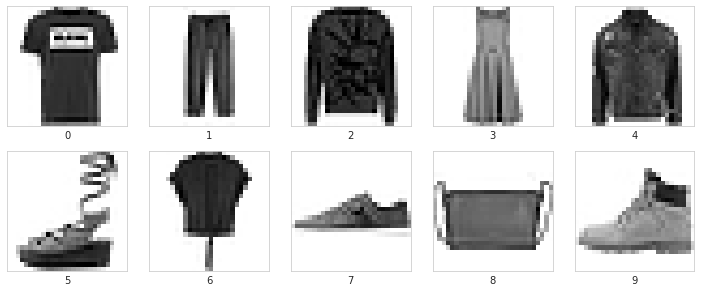

In [15]:
plt.figure(figsize=(10,10))
for i in np.unique(y_train):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[y_train==i][i] / 255.0, cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(i)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [16]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

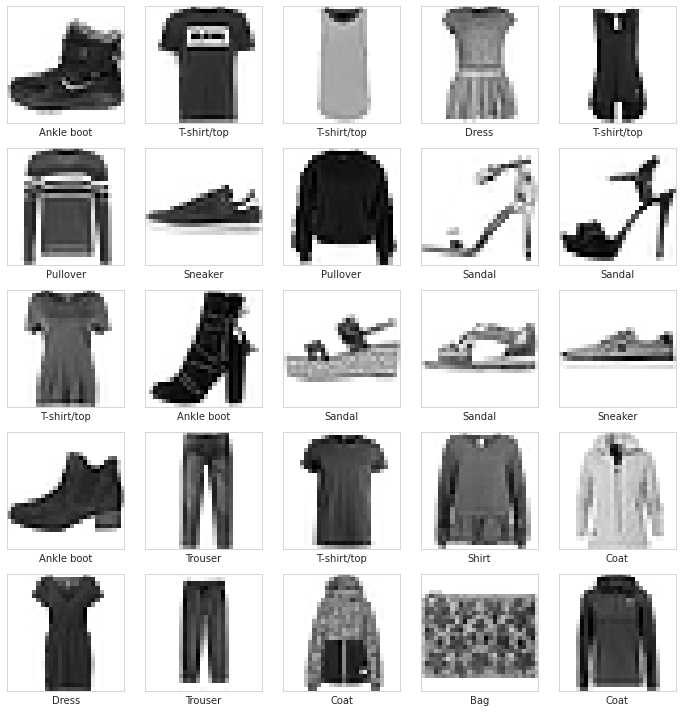

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(classes[y_train[i]])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [18]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [19]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

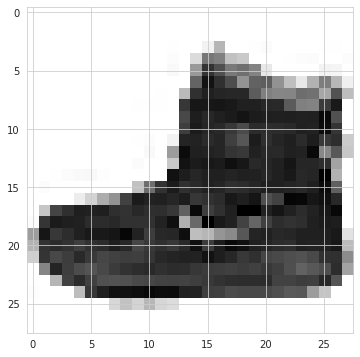

In [21]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [24]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
image_shape = X_train[0].shape
image_shape

(28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
np.unique(y_train).size

10

In [29]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [30]:
y_train[0]

9

In [31]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [104]:
model1 = Sequential()

model1.add(Conv2D(filters=64, kernel_size=(5,5), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model1.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model1.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(10))
model1.add(Activation('softmax'))

# optimizer = keras.optimizers.Adam(lr=0.01)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [105]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 20, 20, 128)       131200    
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 19, 19, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 18, 18, 64)        32832     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 17, 17, 64)     

In [106]:
early_stop = EarlyStopping(monitor='val_loss', patience=11, restore_best_weights = True)

In [107]:
%%time
model1.fit(
    X_train, Y_train, 
    epochs=50,
    batch_size=32,  
    validation_data=(X_test,Y_test),
    callbacks=[early_stop]
)

Epoch 1/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0808 - accuracy: 0.8367 - recall: 0.8157 - auc: 0.9819 - precision_at_recall_10: 0.8799 - val_loss: 0.0579 - val_accuracy: 0.8870 - val_recall: 0.8768 - val_auc: 0.9895 - val_precision_at_recall_10: 0.9479
Epoch 2/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0546 - accuracy: 0.8931 - recall: 0.8852 - auc: 0.9880 - precision_at_recall_10: 0.9553 - val_loss: 0.0571 - val_accuracy: 0.8958 - val_recall: 0.8905 - val_auc: 0.9835 - val_precision_at_recall_10: 0.9564
Epoch 3/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0507 - accuracy: 0.9006 - recall: 0.8932 - auc: 0.9889 - precision_at_recall_10: 0.9635 - val_loss: 0.0526 - val_accuracy: 0.9005 - val_recall: 0.8923 - val_auc: 0.9884 - val_precision_at_recall_10: 0.9658
Epoch 4/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0511 - accuracy: 0.9034 - recall: 0.8965 - auc: 0.9889 - precisio

In [108]:
# save model permanently and check
model1.save('/content/drive/MyDrive/fashion_mnist1.h5')

In [109]:
model1.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall_10']

In [116]:
summary1 = pd.DataFrame(model1.history.history)
summary1.tail()

,loss,accuracy,recall,auc,precision_at_recall_10,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_10
9,0.071,0.885,0.873,0.985,0.948,0.070,0.878,0.867,0.987,0.949
10,0.074,0.881,0.868,0.984,0.945,0.074,0.873,0.862,0.984,0.939
11,0.077,0.874,0.860,0.983,0.938,0.089,0.881,0.875,0.980,0.943
12,0.079,0.876,0.861,0.983,0.939,0.097,0.873,0.868,0.976,0.937
13,0.082,0.869,0.853,0.983,0.932,0.112,0.856,0.852,0.972,0.913


**TASK 7: Plot values of metrics you used in your model.**

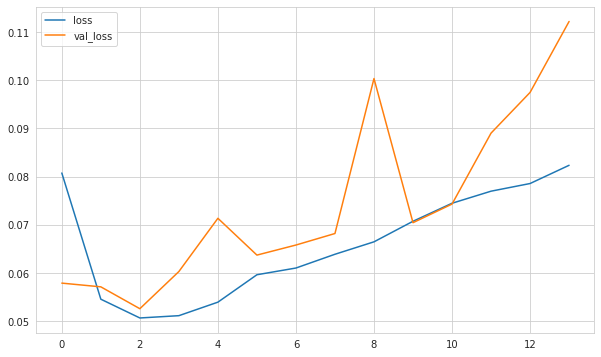

In [111]:
summary1[["loss", "val_loss"]].plot();

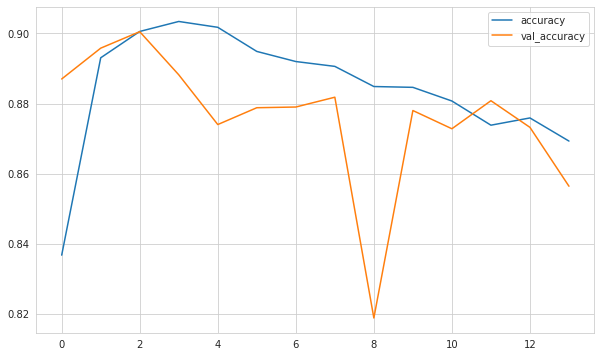

In [112]:
summary1[["accuracy", "val_accuracy"]].plot();

# Modelling-2

In [172]:
model2 = Sequential()

model2.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Dense(10))
model2.add(Activation('softmax'))

# optimizer = keras.optimizers.Adam(lr=0.01)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [173]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_36 (Bat  (None, 26, 26, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 11, 11, 256)       295168    
                                                                 
 batch_normalization_37 (Bat  (None, 11, 11, 256)      1024      
 chNormalization)                                                
                                                     

In [174]:
early_stop = EarlyStopping(monitor='val_loss', patience=11, restore_best_weights = True)

In [175]:
%%time
model2.fit(
    X_train, Y_train, 
    epochs=50,
    batch_size=32,  
    validation_data=(X_test,Y_test),
    callbacks=[early_stop]
)

Epoch 1/50
1875/1875 [==============================] - 17s 8ms/step - loss: 0.0844 - accuracy: 0.8357 - recall: 0.8127 - auc: 0.9808 - precision_at_recall_17: 0.8772 - val_loss: 0.0793 - val_accuracy: 0.8231 - val_recall: 0.8137 - val_auc: 0.9813 - val_precision_at_recall_17: 0.8463
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0576 - accuracy: 0.8869 - recall: 0.8756 - auc: 0.9882 - precision_at_recall_17: 0.9486 - val_loss: 0.0852 - val_accuracy: 0.8259 - val_recall: 0.8163 - val_auc: 0.9722 - val_precision_at_recall_17: 0.8563
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0508 - accuracy: 0.9001 - recall: 0.8907 - auc: 0.9901 - precision_at_recall_17: 0.9633 - val_loss: 0.0549 - val_accuracy: 0.8916 - val_recall: 0.8837 - val_auc: 0.9862 - val_precision_at_recall_17: 0.9526
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0455 - accuracy: 0.9104 - recall: 0.9026 - auc: 0.9912 - precision

In [176]:
# save model permanently and check
model2.save('/content/drive/MyDrive/fashion_mnist2.h5')

In [177]:
model2.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall_17']

In [178]:
summary2 = pd.DataFrame(model2.history.history)
summary2.tail()

,loss,accuracy,recall,auc,precision_at_recall_17,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_17
14,0.020,0.961,0.959,0.997,0.995,0.054,0.916,0.913,0.983,0.970
15,0.019,0.963,0.961,0.997,0.996,0.069,0.896,0.893,0.976,0.956
16,0.018,0.966,0.964,0.997,0.996,0.059,0.918,0.916,0.980,0.966
17,0.017,0.967,0.965,0.997,0.996,0.058,0.918,0.916,0.981,0.968
18,0.016,0.970,0.968,0.997,0.996,0.067,0.908,0.904,0.978,0.964


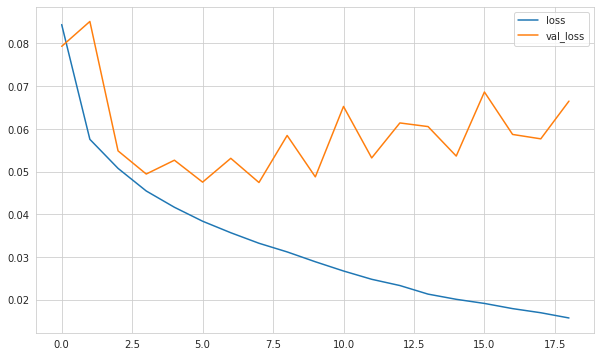

In [179]:
summary2[["loss", "val_loss"]].plot();

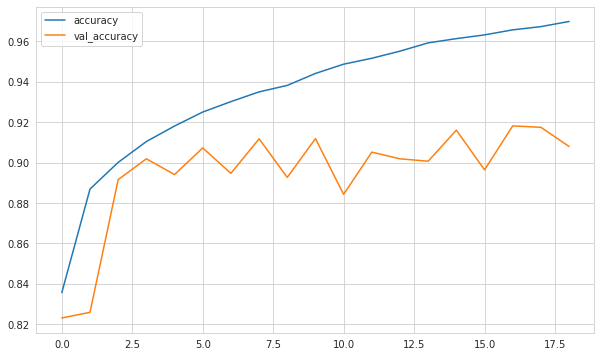

In [180]:
summary2[["accuracy", "val_accuracy"]].plot();

# Compare and Select Models

In [170]:
# metrics = ['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall']
colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history, metrics):
  for n, metric in enumerate(metrics):
    name = str(metric).replace("_"," ").capitalize()
    plt.subplot(3,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'AUC':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

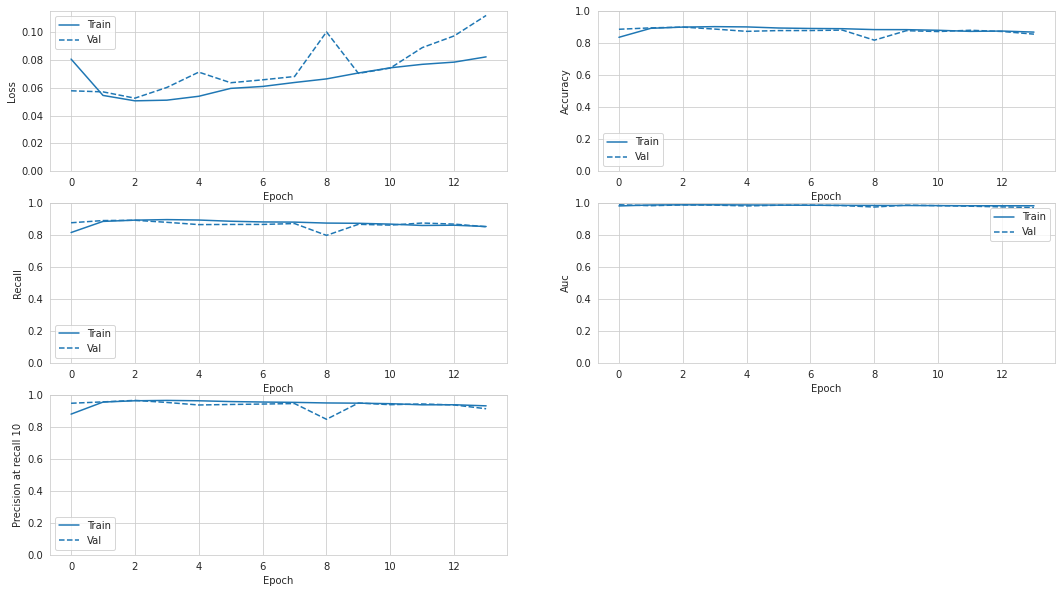

In [124]:
metrics = summary1.columns[:5]
plt.figure(figsize=(18,10))
plot_metrics(model1.history, metrics=metrics)

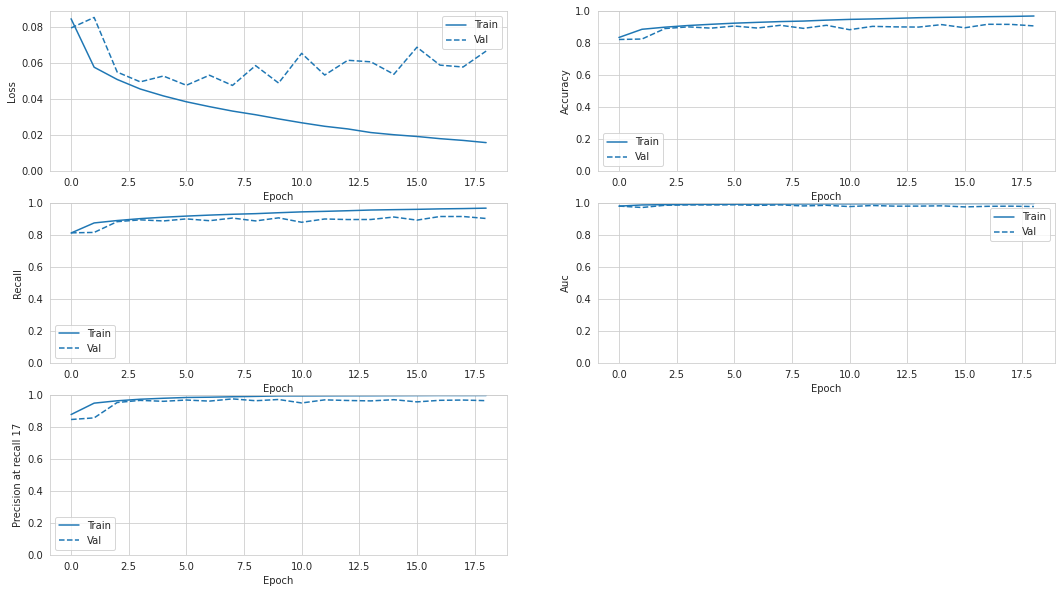

In [181]:
metrics = summary2.columns[:5]
plt.figure(figsize=(18,10))
plot_metrics(model2.history, metrics=metrics)

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [182]:
from sklearn.metrics import classification_report, confusion_matrix

In [183]:
score = model2.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0475 - accuracy: 0.9118 - recall: 0.9061 - auc: 0.9884 - precision_at_recall_17: 0.9752
Test loss: 0.04747641459107399
Test accuracy: 0.9118000268936157


In [184]:
pred_prob = model2.predict(X_test)
pred_prob

array([[7.66880800e-18, 2.33820745e-22, 1.03185653e-17, ...,
        2.82908506e-11, 1.70879823e-21, 1.00000000e+00],
       [1.38007197e-08, 1.37476730e-16, 9.99998093e-01, ...,
        3.42806344e-17, 2.86716397e-12, 7.11748747e-19],
       [2.13388112e-22, 1.00000000e+00, 8.40445633e-21, ...,
        1.02725739e-32, 1.11916568e-22, 4.08106060e-30],
       ...,
       [4.49324049e-24, 4.61555976e-32, 2.87270626e-25, ...,
        9.99459767e-36, 1.00000000e+00, 8.58132682e-32],
       [9.41883262e-28, 1.00000000e+00, 1.69927726e-26, ...,
        0.00000000e+00, 2.87153785e-30, 3.09511602e-38],
       [1.10950928e-08, 6.78442580e-10, 1.36092582e-10, ...,
        3.65143092e-06, 3.33467121e-08, 1.04118136e-07]], dtype=float32)

In [185]:
y_pred = np.argmax(pred_prob, axis=1)

In [186]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.87      0.86      1000
           3       0.91      0.92      0.92      1000
           4       0.84      0.89      0.86      1000
           5       0.96      0.99      0.98      1000
           6       0.78      0.70      0.73      1000
           7       0.97      0.96      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [188]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

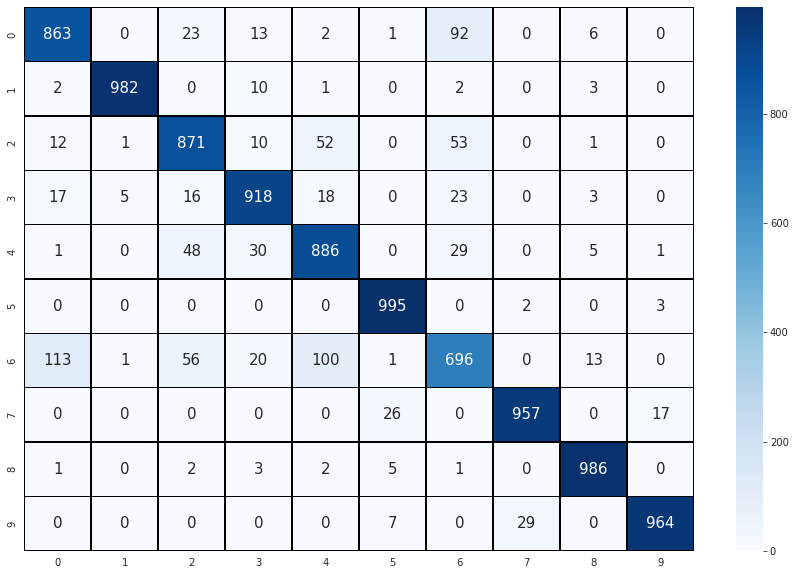

In [190]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, cmap="Blues", lw=.5, linecolor='black', 
            fmt='g', annot_kws = {"size": 15})

## Prediction

In [191]:
model = tf.keras.models.load_model('/content/drive/MyDrive/fashion_mnist2.h5')

In [192]:
X_test[0].shape

(28, 28, 1)

In [194]:
np.expand_dims(X_test[0],axis=0).shape

(1, 28, 28, 1)

In [195]:
pred = model.predict(np.expand_dims(X_test[0],axis=0))

In [196]:
np.argmax(pred)

9

In [204]:
classes[9]

'Ankle boot'

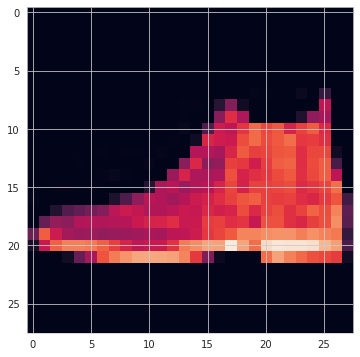

In [202]:
plt.imshow(X_test[0].squeeze())

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___